In [1]:
# Import dependancies
import requests
import json
import pandas as pd
from pprint import pprint
import numpy as np

In [2]:
url = "http://asterank.com/api/asterank?query=" 
response = requests.get(url + '{"price":{"$lt":1, "$gt":0}}&limit=1000').json()

df = pd.DataFrame(response)
df = df.sort_values(by = 'price' , ascending = False)

In [3]:
response2 = requests.get(url + '{"price":{"$gt":1}}&limit=1000').json()
df2 = pd.DataFrame(response2)

In [4]:
neo_df = df[['full_name', 'spec' , 'class' , 'ad' , 'q' , 'a' , 'e' , 'dv' ,'per' , 'price' , 'profit' , 'moid' , 'diameter']]
neo_df2 = df2[['full_name', 'spec' , 'class' , 'ad' , 'q' , 'a' , 'e' , 'dv' ,'per' , 'price' , 'profit' , 'moid' , 'diameter']]
neo_df2

,full_name,spec,class,ad,q,a,e,dv,per,price,profit,moid,diameter
0,(2002 AT4),D,AMO,2.700043,1.033903,1.866973,0.446214,5.557219,931.763080,1.599387e+03,3.344928e+02,0.042987,
1,(2001 SG286),D,APO,1.829700,0.886638,1.358169,0.347181,5.640122,578.134644,2.420770e+03,4.868816e+02,0.005336,
2,(2001 YE1),T,APO,2.870736,0.954085,1.912410,0.501109,5.905332,965.984260,1.450130e+04,2.547227e+03,0.059394,
3,(2001 UU92),T,AMO,5.287454,1.053954,3.170704,0.667596,7.286746,2062.205995,3.814231e+04,4.300143e+03,0.118818,
4,96 Aegle,T,MBA,3.479834,2.621945,3.050889,0.140597,NaN,1946.427065,6.196000e+04,3.981251e+03,1.641370,177.774
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,372 Palma (1893 AH),B,MBA,3.966001,2.334280,3.150141,0.258992,11.987880,2042.176736,4.065526e+18,2.615080e+17,1.446870,173.642
992,423 Diotima (1896 DB),C,MBA,3.176470,2.956412,3.066441,0.035882,11.224330,1961.328629,4.235026e+18,2.908848e+17,1.942490,175.859
993,702 Alauda (1910 KQ),B,MBA,3.247375,3.137278,3.192327,0.017244,12.757615,2083.336507,5.408989e+18,3.264933e+17,2.120800,190.98
994,334 Chicago (1892 L),C,OMB,3.981728,3.798870,3.890299,0.023502,11.703702,2802.676341,6.115258e+18,4.009727e+17,2.782950,198.77


## Headers

spec = spectral type

ad = aphelion distance (AU)

q = perihelion (AU)

a = semi-major axis (AU) => (longest diameter from its obit)

e = eccentricity

dv = delta-velocity

per = period => (how long for 1 revolution around the sun)

moid = minimum orbit intersection distance

In [5]:
merged_df = neo_df.append(neo_df2)
merged_df

,full_name,spec,class,ad,q,a,e,dv,per,price,profit,moid,diameter
797,532 Herculina (1904 NY),S,MBA,3.258720,2.286373,2.772546,0.175353,10.733275,1686.229234,8.378840e-37,6.035861e-38,1.35440,167.791
796,354 Eleonora (1893 A),Sl,MBA,3.117824,2.479441,2.798633,0.114053,11.416972,1710.083231,5.863736e-37,3.967666e-38,1.49290,148.97
795,471 Papagena (1901 GN),S,MBA,3.555410,2.232245,2.893827,0.228619,10.449882,1798.072857,5.764868e-37,4.264148e-38,1.26726,148.128
794,349 Dembowska (1892 T),R,MBA,3.190289,2.654931,2.922610,0.091589,10.493194,1824.965628,4.843060e-37,3.564270e-38,1.65738,139.77
793,40 Harmonia,S,MBA,2.373855,2.160638,2.267247,0.047021,NaN,1246.942831,2.442248e-37,1.579404e-38,1.16159,111.251
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,372 Palma (1893 AH),B,MBA,3.966001,2.334280,3.150141,0.258992,11.987880,2042.176736,4.065526e+18,2.615080e+17,1.44687,173.642
992,423 Diotima (1896 DB),C,MBA,3.176470,2.956412,3.066441,0.035882,11.224330,1961.328629,4.235026e+18,2.908848e+17,1.94249,175.859
993,702 Alauda (1910 KQ),B,MBA,3.247375,3.137278,3.192327,0.017244,12.757615,2083.336507,5.408989e+18,3.264933e+17,2.12080,190.98
994,334 Chicago (1892 L),C,OMB,3.981728,3.798870,3.890299,0.023502,11.703702,2802.676341,6.115258e+18,4.009727e+17,2.78295,198.77


In [6]:
new_df = merged_df.replace('', np.nan, inplace=False)
new_df

,full_name,spec,class,ad,q,a,e,dv,per,price,profit,moid,diameter
797,532 Herculina (1904 NY),S,MBA,3.258720,2.286373,2.772546,0.175353,10.733275,1686.229234,8.378840e-37,6.035861e-38,1.35440,167.791
796,354 Eleonora (1893 A),Sl,MBA,3.117824,2.479441,2.798633,0.114053,11.416972,1710.083231,5.863736e-37,3.967666e-38,1.49290,148.97
795,471 Papagena (1901 GN),S,MBA,3.555410,2.232245,2.893827,0.228619,10.449882,1798.072857,5.764868e-37,4.264148e-38,1.26726,148.128
794,349 Dembowska (1892 T),R,MBA,3.190289,2.654931,2.922610,0.091589,10.493194,1824.965628,4.843060e-37,3.564270e-38,1.65738,139.77
793,40 Harmonia,S,MBA,2.373855,2.160638,2.267247,0.047021,NaN,1246.942831,2.442248e-37,1.579404e-38,1.16159,111.251
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,372 Palma (1893 AH),B,MBA,3.966001,2.334280,3.150141,0.258992,11.987880,2042.176736,4.065526e+18,2.615080e+17,1.44687,173.642
992,423 Diotima (1896 DB),C,MBA,3.176470,2.956412,3.066441,0.035882,11.224330,1961.328629,4.235026e+18,2.908848e+17,1.94249,175.859
993,702 Alauda (1910 KQ),B,MBA,3.247375,3.137278,3.192327,0.017244,12.757615,2083.336507,5.408989e+18,3.264933e+17,2.12080,190.98
994,334 Chicago (1892 L),C,OMB,3.981728,3.798870,3.890299,0.023502,11.703702,2802.676341,6.115258e+18,4.009727e+17,2.78295,198.77


In [7]:
new_df = new_df.dropna()
new_df

,full_name,spec,class,ad,q,a,e,dv,per,price,profit,moid,diameter
797,532 Herculina (1904 NY),S,MBA,3.258720,2.286373,2.772546,0.175353,10.733275,1686.229234,8.378840e-37,6.035861e-38,1.35440,167.791
796,354 Eleonora (1893 A),Sl,MBA,3.117824,2.479441,2.798633,0.114053,11.416972,1710.083231,5.863736e-37,3.967666e-38,1.49290,148.97
795,471 Papagena (1901 GN),S,MBA,3.555410,2.232245,2.893827,0.228619,10.449882,1798.072857,5.764868e-37,4.264148e-38,1.26726,148.128
794,349 Dembowska (1892 T),R,MBA,3.190289,2.654931,2.922610,0.091589,10.493194,1824.965628,4.843060e-37,3.564270e-38,1.65738,139.77
791,674 Rachele (1908 EP),S,MBA,3.493765,2.351323,2.922544,0.195453,10.483907,1824.903811,1.577649e-37,1.162629e-38,1.38596,96.171
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,372 Palma (1893 AH),B,MBA,3.966001,2.334280,3.150141,0.258992,11.987880,2042.176736,4.065526e+18,2.615080e+17,1.44687,173.642
992,423 Diotima (1896 DB),C,MBA,3.176470,2.956412,3.066441,0.035882,11.224330,1961.328629,4.235026e+18,2.908848e+17,1.94249,175.859
993,702 Alauda (1910 KQ),B,MBA,3.247375,3.137278,3.192327,0.017244,12.757615,2083.336507,5.408989e+18,3.264933e+17,2.12080,190.98
994,334 Chicago (1892 L),C,OMB,3.981728,3.798870,3.890299,0.023502,11.703702,2802.676341,6.115258e+18,4.009727e+17,2.78295,198.77


In [8]:
new_df = new_df.reset_index().drop(['index'], axis =1)
new_df.sort_values('profit').loc[621:622]

,full_name,spec,class,ad,q,a,e,dv,per,price,profit,moid,diameter
621,1103 Sequoia (1928 VB),Xk,IMB,2.116681,1.751157,1.933919,0.094504,9.835305,982.326443,3.931429e+13,3.120547e+12,0.811874,6.692
620,4297 Eichhorn (1938 HE),Cb,MBA,2.785513,1.885312,2.335412,0.192728,8.708535,1303.598237,3.837472e+13,3.450739e+12,0.869192,3.668
613,25330 (1999 KV4),B,APO,2.111466,0.969149,1.540308,0.370808,6.383857,698.247843,2.568429e+13,3.733969e+12,0.172981,3.21
622,53319 (1999 JM8),X,APO,4.474529,0.977429,2.725979,0.641439,7.858447,1643.926043,4.499629e+13,4.576588e+12,0.024720,7.0


Median profit = 0
<br> 1 = profitable
<br> 0 = not profitable

In [9]:
new_df['profitable'] = (new_df['profit'] > 1).astype(int)
new_df['diameter'] = new_df['diameter'].astype(float)
new_df

,full_name,spec,class,ad,q,a,e,dv,per,price,profit,moid,diameter,profitable
0,532 Herculina (1904 NY),S,MBA,3.258720,2.286373,2.772546,0.175353,10.733275,1686.229234,8.378840e-37,6.035861e-38,1.35440,167.791,0
1,354 Eleonora (1893 A),Sl,MBA,3.117824,2.479441,2.798633,0.114053,11.416972,1710.083231,5.863736e-37,3.967666e-38,1.49290,148.970,0
2,471 Papagena (1901 GN),S,MBA,3.555410,2.232245,2.893827,0.228619,10.449882,1798.072857,5.764868e-37,4.264148e-38,1.26726,148.128,0
3,349 Dembowska (1892 T),R,MBA,3.190289,2.654931,2.922610,0.091589,10.493194,1824.965628,4.843060e-37,3.564270e-38,1.65738,139.770,0
4,674 Rachele (1908 EP),S,MBA,3.493765,2.351323,2.922544,0.195453,10.483907,1824.903811,1.577649e-37,1.162629e-38,1.38596,96.171,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,372 Palma (1893 AH),B,MBA,3.966001,2.334280,3.150141,0.258992,11.987880,2042.176736,4.065526e+18,2.615080e+17,1.44687,173.642,1
1239,423 Diotima (1896 DB),C,MBA,3.176470,2.956412,3.066441,0.035882,11.224330,1961.328629,4.235026e+18,2.908848e+17,1.94249,175.859,1
1240,702 Alauda (1910 KQ),B,MBA,3.247375,3.137278,3.192327,0.017244,12.757615,2083.336507,5.408989e+18,3.264933e+17,2.12080,190.980,1
1241,334 Chicago (1892 L),C,OMB,3.981728,3.798870,3.890299,0.023502,11.703702,2802.676341,6.115258e+18,4.009727e+17,2.78295,198.770,1


In [10]:
# new_df.to_csv("resources/asteroid.csv")

In [11]:
X = new_df.drop(['full_name','profit','price','spec', 'class','profitable'], axis =1)
y = new_df['profitable']

Dropped profit and price assuming we don't already know that information about a newly discovered asteroid. Dropped spectral type since we are very unlikely to know the spectral type for a new asteroid. "The overwhelming majority of asteroids have no spectral classification and are missing other important data attributes." (asterank.com) Dropped class because class is determined by the other features. 

In [12]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
clf_for = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_train_scaled, y_train)
print(f'Training Score: {clf_for.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf_for.score(X_test_scaled, y_test)}')


Training Score: 1.0
Testing Score: 0.8167202572347267


model 1 (RandomForest) ==> Good accuracy scores, not overfitting

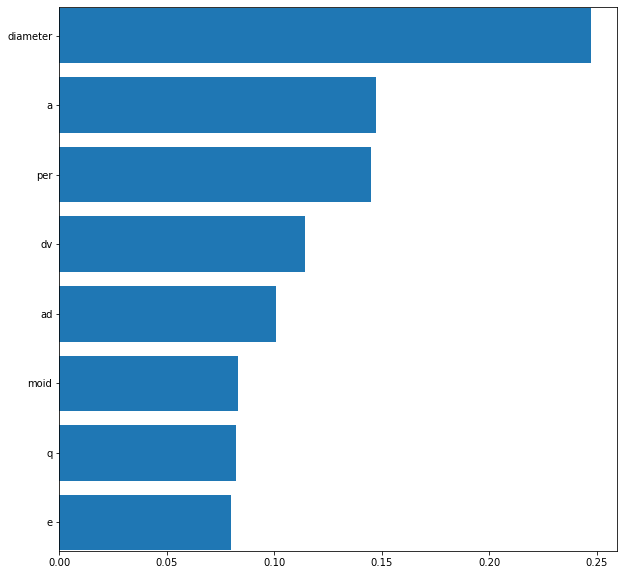

In [16]:
feature_importances = clf_for.feature_importances_
features = sorted(zip(X.columns, clf_for.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [17]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf_for)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=1))

In [18]:
clf_log = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf_log.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf_log.score(X_test_scaled, y_test)}')

Training Score: 0.7392703862660944
Testing Score: 0.7395498392282959


In [19]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [20]:
clf_log_sel = LogisticRegression().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf_log_sel.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf_log_sel.score(X_selected_test_scaled, y_test)}')

Training Score: 0.7639484978540773
Testing Score: 0.7363344051446945


model 2 (Logistic Regression) ==> decent accuracy, but training score is a bit low

In [27]:
# saving model
joblib.dump(clf_for,"rf_model.joblib")

['rf_model.joblib']